<h1 align=center>Supermarket Sales Exploratory Data Analysis</h1>

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport
import datetime as dt

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [75]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [6]:
df.describe()

Unit price    Quantity       Tax 5%        Total  \
count  996.000000  983.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   
min     10.080000    1.000000     0.508500    10.678500   
25%     33.125000    3.000000     5.894750   123.789750   
50%     55.420000    5.000000    12.096000   254.016000   
75%     78.085000    8.000000    22.539500   473.329500   
max     99.960000   10.000000    49.650000  1042.650000   
std     26.510165    2.924673    11.715192   246.019028   

                                Date         cogs  gross margin percentage  \
count                           1003  1003.000000             1.003000e+03   
mean   2019-02-14 00:18:39.840478464   308.007358             4.761905e+00   
min              2019-01-01 00:00:00    10.170000             4.761905e+00   
25%              2019-01-24 00:00:00   117.895000             4.761905e+00   
50%              2019-02-13 00:00:00   241.920000             4.761905e+00   
75%              2019-03-08 00:00:00   450.790000             4.761905e+00   
max              2019-03-30 00:00:00   993.000000             4.761905e+00   
std                              NaN   234.303836             8.886215e-16   

       gross income       Rating  
count   1003.000000  1003.000000  
mean      15.400368     6.972682  
min        0.508500     4.000000  
25%        5.894750     5.500000  
50%       12.096000     7.000000  
75%       22.539500     8.500000  
max       49.650000    10.000000  
std       11.715192     1.717647

### Task 2: Univariative Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

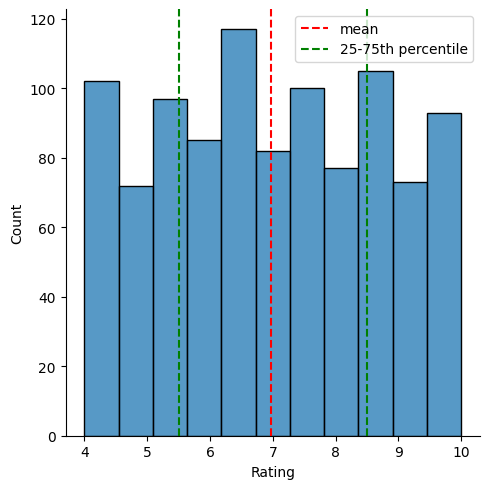

In [7]:
sns.displot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c='green', ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c='green', ls='--')
plt.legend()

The distribution of the Rating is uniform and there is not skewed to the left or to the right. 

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'cogs'}>],
       [<Axes: title={'center': 'gross margin percentage'}>,
        <Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

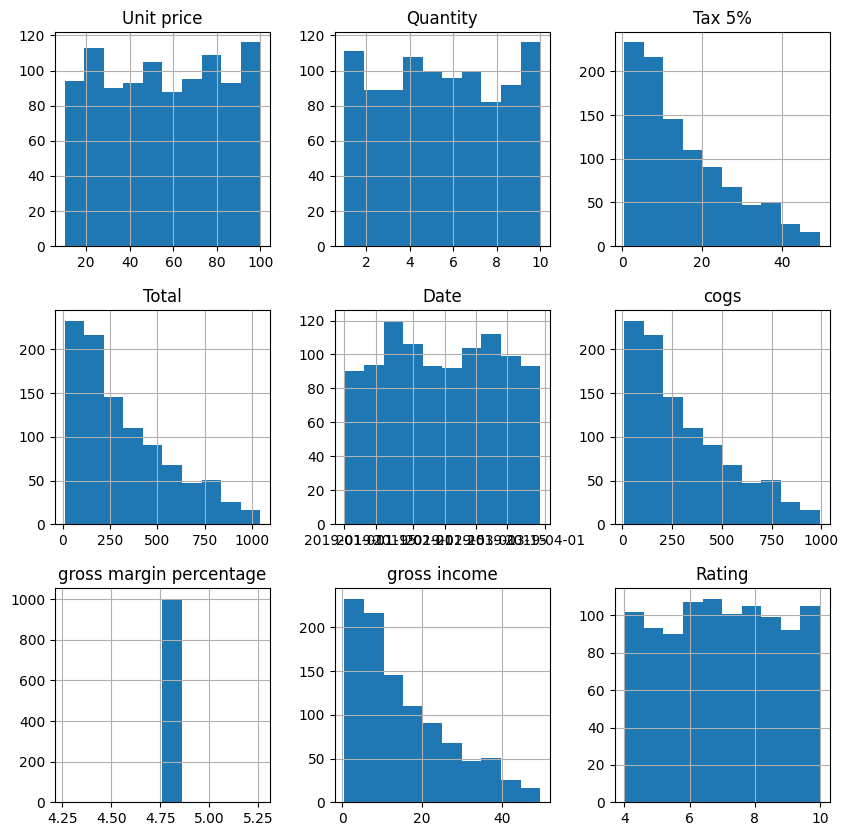

In [8]:
df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

<Axes: xlabel='Branch', ylabel='count'>

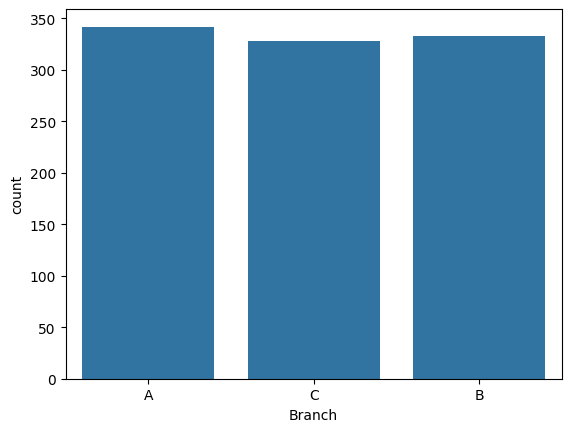

In [9]:
sns.countplot(x=df['Branch'])

In [10]:
df['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

<Axes: xlabel='Payment', ylabel='count'>

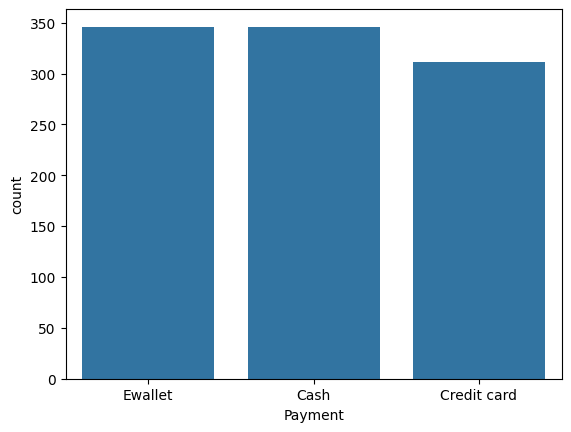

In [11]:
sns.countplot(x=df['Payment'])

- Branch A has the most frequent transactions. However it's not very different from Branch B and C
- Ewallet is the most favorable type of payment compare to credit card or cash payment. 

### Task 3: Bivariative Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

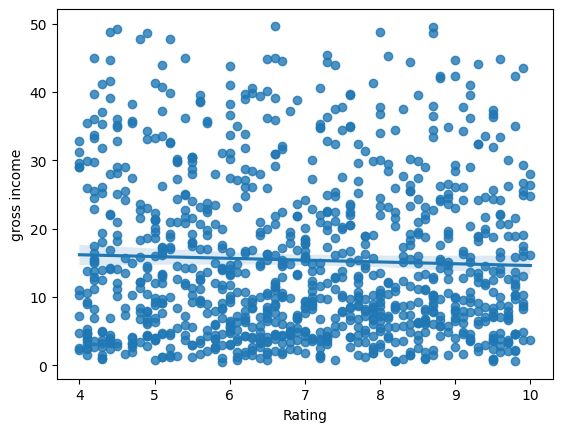

In [12]:
sns.regplot(x=df['Rating'], y=df['gross income'])

Based on the scatter plot above, there is no relationship between Rating and Gross income.

**Is there any variance of gross income when it comes to branch?**

<Axes: xlabel='Branch', ylabel='gross income'>

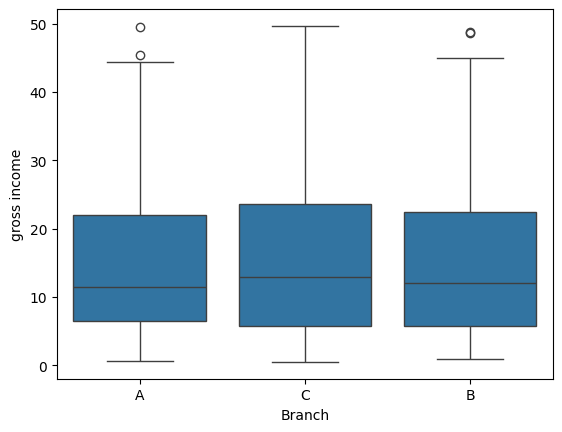

In [13]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

Above boxplot showing no variable among 3 branches. 

<Axes: xlabel='Gender', ylabel='gross income'>

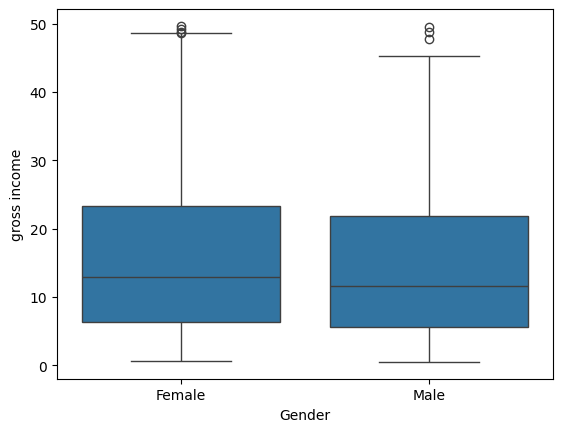

In [14]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

There are not signigicant difference when it comes to Female and Male spending. 

**Question 4:** Is there a noticeable time trend in gross income?

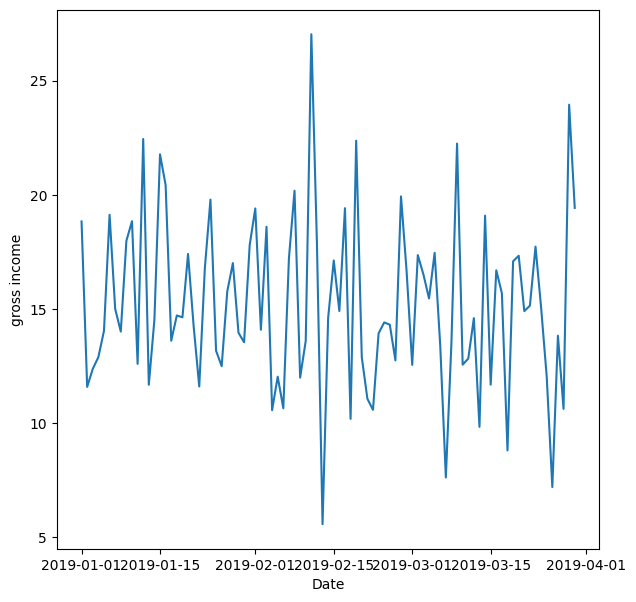

In [76]:
fig, ax = plt.subplots(figsize=(7,7))

sns.lineplot(df['gross income'].groupby(df['Date']).mean())
plt.show()

In [90]:
df['gross income'].groupby(df['Date']).mean().sort_values(ascending=False)

Date
2019-02-11    27.036625
2019-03-29    23.947875
2019-01-12    22.444864
2019-02-19    22.371000
2019-03-09    22.244187
                ...    
2019-03-13     9.826700
2019-03-18     8.794786
2019-03-07     7.609833
2019-03-26     7.188692
2019-02-13     5.560937
Name: gross income, Length: 89, dtype: float64

There is high spike on 2019-02-11

In [28]:
pd.to_datetime('2019-02-11').day_name()

'Monday'

**Let's see if there is significant day in a week where the gross income is high**

In [31]:
df['Day'] = df['Date'].dt.day_name()

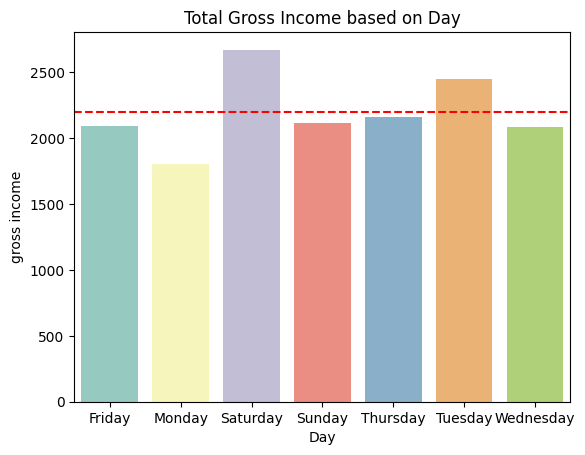

In [88]:
sns.barplot(x='Day', 
            y='gross income', 
            data=df[['Day', 'gross income']].groupby('Day')['gross income'].sum().reset_index(),
            hue='Day',
            palette='Set3')

plt.axhline(y=df[['Day', 'gross income']].groupby('Day')['gross income'].sum().mean(), c='red', ls='--')
plt.title('Total Gross Income based on Day')
plt.show()

- Saturday shows the most highest gross income in total by Day. 
- Looking at the line plot above, it seems that there is a high spike on Monday 2019-02-11'. Let's see what happened on this date

In [92]:
df[df['Date'] == '2019-02-11']

Invoice ID Branch       City Customer type  Gender         Product line  \
71   796-12-2025      C  Naypyitaw        Normal    Male  Fashion accessories   
190  284-34-9626      B   Mandalay        Normal  Female  Fashion accessories   
232  418-02-5978      B   Mandalay        Normal  Female    Health and beauty   
561  866-99-7614      C  Naypyitaw        Normal    Male   Food and beverages   
760  842-40-8179      B   Mandalay        Member  Female   Food and beverages   
781  534-53-3526      A     Yangon        Normal  Female    Sports and travel   
799  401-09-4232      C  Naypyitaw        Member    Male   Home and lifestyle   
973  531-56-4728      A     Yangon        Normal    Male   Home and lifestyle   

     Unit price   Quantity   Tax 5%     Total       Date   Time      Payment  \
71        62.12  10.000000  31.0600  652.2600 2019-02-11  16:19         Cash   
190       77.04   3.000000  11.5560  242.6760 2019-02-11  10:39  Credit card   
232       84.09   9.000000  37.8405  794.6505 2019-02-11  10:54         Cash   
561       89.20  10.000000  44.6000  936.6000 2019-02-11  15:42  Credit card   
760       77.20  10.000000  38.6000  810.6000 2019-02-11  10:38  Credit card   
781       94.76   4.000000  18.9520  397.9920 2019-02-11  16:06      Ewallet   
799       86.69   5.000000  21.6725  455.1225 2019-02-11  18:38      Ewallet   
973       80.08   5.503568  12.0120  252.2520 2019-02-11  15:29         Cash   

       cogs  gross margin percentage  gross income  Rating     Day  
71   621.20                 4.761905       31.0600     5.9  Monday  
190  231.12                 4.761905       11.5560     7.2  Monday  
232  756.81                 4.761905       37.8405     8.0  Monday  
561  892.00                 4.761905       44.6000     4.4  Monday  
760  772.00                 4.761905       38.6000     5.6  Monday  
781  379.04                 4.761905       18.9520     7.8  Monday  
799  433.45                 4.761905       21.6725     9.4  Monday  
973  240.24                 4.761905       12.0120     5.4  Monday

Interesting! The gross income on this day is doubled the mean. It also looks like couple of transactions are tripled the mean

### Task 4: Dealing with Duplicate Rows

In [61]:
df.duplicated().sum()

3

In [62]:
df[df.duplicated()]

Invoice ID Branch      City Customer type  Gender  \
1000  849-09-3807      A    Yangon        Member  Female   
1001  745-74-0715      A    Yangon        Normal    Male   
1002  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total  \
1000     Fashion accessories       88.34       7.0  30.919  649.299   
1001  Electronic accessories         NaN       2.0   5.803  121.863   
1002  Electronic accessories       87.08       NaN  30.478  640.038   

           Date   Time  Payment    cogs  gross margin percentage  \
1000 2019-02-18  13:28     Cash  618.38                 4.761905   
1001 2019-03-10  20:46  Ewallet  116.06                 4.761905   
1002 2019-01-26  15:17     Cash  609.56                 4.761905   

      gross income  Rating       Day  
1000        30.919     6.6    Monday  
1001         5.803     8.8    Sunday  
1002        30.478     5.5  Saturday

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.isna().sum()/len(df)*100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              7.9
Gender                     0.0
Product line               4.3
Unit price                 0.6
Quantity                   1.9
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
Day                        0.0
dtype: float64

<Axes: >

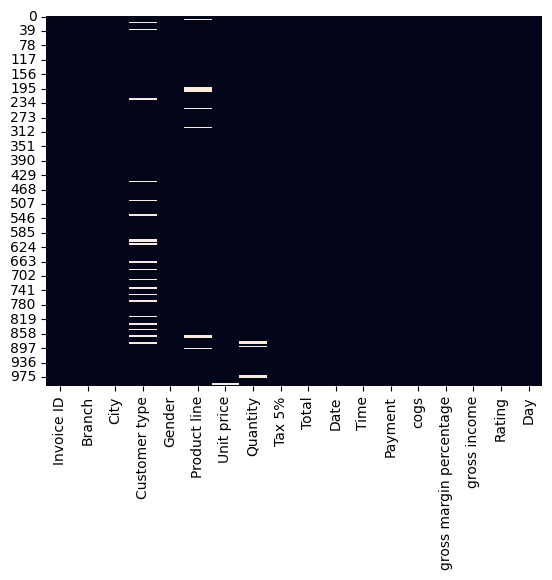

In [65]:
sns.heatmap(df.isnull(), cbar=False)

In [66]:
df[df.columns[df.isna().any()]].dtypes


Customer type     object
Product line      object
Unit price       float64
Quantity         float64
dtype: object

In [67]:
df[['Unit price', 'Quantity']] = df[['Unit price', 'Quantity']].fillna(df[['Unit price', 'Quantity']].mean())

In [68]:
df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.700292
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Date                       2019-02-07 00:00:00
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Day                                   Saturday
Name: 0, dtype: object

In [69]:
df[['Customer type', 'Product line']] = df[['Customer type', 'Product line']].fillna(df[['Customer type', 'Product line']].mode().iloc[0])

<Axes: >

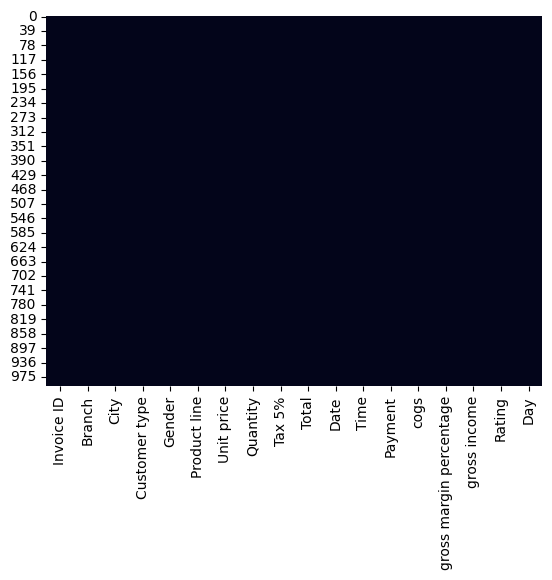

In [70]:
sns.heatmap(df.isnull(), cbar=False)

### Task 5: Correlation Analysis

In [71]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28       5.0   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22       8.0  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31       7.0  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

        Day  
0  Saturday  
1    Friday  
2    Sunday  
3    Sunday  
4    Friday

In [72]:
np.round(df.select_dtypes(include='float64').corr().fillna(0),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage        0.00      0.00    0.00   0.00  0.00   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   0.0          0.63   -0.01  
Quantity                                     0.0          0.70   -0.02  
Tax 5%                                       0.0          1.00   -0.04  
Total                                        0.0          1.00   -0.04  
cogs                                         0.0          1.00   -0.04  
gross margin percentage                      0.0          0.00    0.00  
gross income                                 0.0          1.00   -0.04  
Rating                                       0.0         -0.04    1.00

<Axes: >

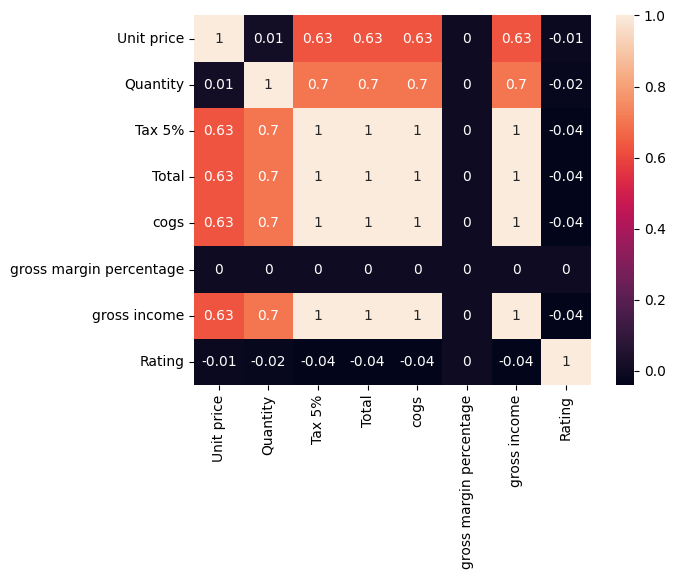

In [73]:
sns.heatmap(np.round(df.select_dtypes(include='float64').corr().fillna(0),2), annot=True)

It's interesting to note that the Rating variable shows no correlation with the other variables. This suggests that the amount customers spend on items is not influenced by the ratings.

### Pandas Profiling

In [74]:
ProfileReport(pd.read_csv('supermarket_sales.csv'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]